In the [linear](./Concepts%20-%20Linear%20Regression.ipynb) models, we used one various inputs to weight each *feature* and predict the *label*.

In Polynomial, we can predict non-linear relationships (those not deriving from a simple scalar / feature combination).

In [4]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(10)

In [3]:
m = 100
X = 6 * np.random.rand(m,1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m,1)

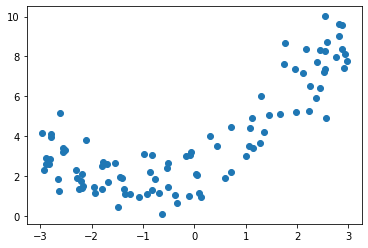

In [6]:
plt.scatter(X, y)

The relationship is no longer linear. 

We can transform the X by adding the square of each x.

In [7]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)

In [10]:
X_poly = poly_features.fit_transform(X)
print(X[0])
print(X_poly[0])

[-0.17212851]
[-0.17212851  0.02962823]


Now each X has its original value, and its square

We can isolate the square using the below call.

In [13]:
X_poly[:,1]

array([2.96282256e-02, 9.07358846e-03, 3.98028557e-01, 4.47032062e+00,
       4.95355286e+00, 5.61898855e+00, 6.59379683e+00, 7.75619779e+00,
       4.78802190e+00, 3.83832256e+00, 1.89086329e-01, 2.55268354e-01,
       7.01502059e+00, 4.86807026e+00, 6.52645805e+00, 8.78469019e+00,
       7.58388487e+00, 1.55488223e+00, 9.97514880e-01, 8.34202456e+00,
       3.53169292e-01, 3.50738859e-03, 2.10940385e+00, 7.74940078e+00,
       1.32602099e+00, 7.87998217e+00, 6.32096962e+00, 5.07582166e+00,
       6.87183857e-01, 6.33137913e+00, 9.15308639e-02, 2.90873846e-01,
       1.10737595e-01, 5.17251440e-01, 8.54344577e-01, 6.03020895e+00,
       2.88602487e+00, 5.77750547e-01, 1.85038089e-03, 5.04401518e+00,
       2.83443307e+00, 5.74306324e+00, 4.62193642e-01, 5.25201484e+00,
       1.62208933e+00, 1.14768225e+00, 8.25010097e+00, 9.68724782e-01,
       2.21935501e+00, 1.11647204e+00, 6.48513898e+00, 8.66509890e+00,
       8.59766024e+00, 6.57834311e+00, 6.70163214e+00, 5.94445887e+00,
      

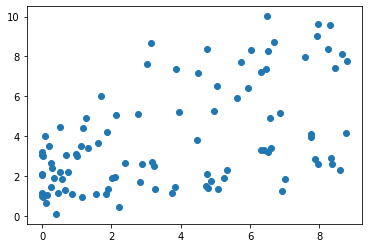

In [14]:
plt.scatter(X_poly[:,1], y)

We can then run a linear regression on this dataset.

In [38]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([2.28487368]), array([[1.00537347, 0.44822487]]))

We now have a weight for the bias term, and then another array for both the original and squared X. From this we can train a model based on $$ y = \theta_0 + \theta_1 x_1 + \theta_2 + x_2^2 $$

## Overfitting

The higher your polynomial degree, the greater the degree of overfitting. The greater curvature allowed in predictions tends to fit right to each point in the training data, rather than providing a slighly more generalized model which would do better in predicting future points.

We can do the same as before and create both a training and valadation set, and make sure that the validation set is proving useful predictions.

So we can graph the learning curves to better understand the model. We look at two things:
1. hieight of the curve plateaus. This tells us the error of our model
2. the distance betweeen the training and validation curve. A large gap shows that the model is overfit (training performance is > validation).

So we want close curves with a low error. 

In [39]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

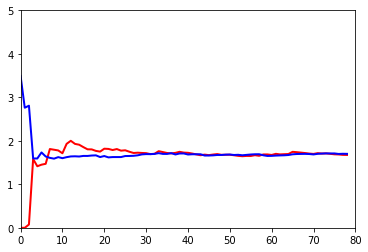

In [47]:
def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors =[], []
    for m in range(1,len(X_train)):
        model.fit(X_train[:m], y_train[:m]) #train the model using gradient decent
        y_train_predict = model.predict(X_train[:m]) # predict for the training set
        y_val_predict = model.predict(X_val) # predict for the validation set
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict)) # get the errors
        val_errors.append(mean_squared_error(y_val,y_val_predict))
    plt.axis([0, 80, 0, 5])
    plt.plot(np.sqrt(train_errors), "r-", linewidth=2, label="train") # plot the errors
    plt.plot(np.sqrt(val_errors), "b-", linewidth=2, label="validation")

lin_reg = LinearRegression()
plot_learning_curves(lin_reg,X,y)

Now we can compare that to the preprocessing we did earlier

In [48]:
from sklearn.pipeline import Pipeline

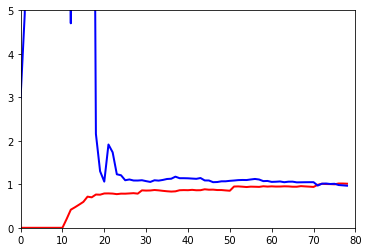

In [49]:
poly_regression = Pipeline([
    ('poly_features', PolynomialFeatures(degree=10, include_bias=False)),
    ('lin_reg', LinearRegression()),
])

plot_learning_curves(poly_regression, X, y)